In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import glob
from scipy.stats import linregress
mpl.rc('font',family='Times New Roman')
font = {'fontname':'Times New Roman'}
size = {'fontsize':12}

In [2]:
'''
Functions
'''
#MAKE SURE THAT THE HEADER IS THE SAME! PMMA IS NOT
#add 4 lines of: ,, anywhere before the data in PMMA and this will even it out
def file_reader(files):
    files = glob.glob(files)
    data = {}
    for file in files:
        name = (file.split('/')[1]).split('_')[0][4:]
        data[name] = np.array(pd.read_csv(file,header=28))
    return data

def ques1(array):
    return np.mean(array),np.median(array),np.std(array)

def ques3(array,diam):
    area = np.pi*(diam)**2 / 4
    stress = array[:,2] / area
    strain = array[:,3]
    return strain,stress*1000 #put into MPa, kn/mm = 1000MPa
'''
Data Construction
'''

Dict = file_reader('data/*.csv')
flat = np.array(pd.read_csv('data/hardness.txt',sep='\t'))
alb = flat[:,0][flat[:,0] != 0.0]
stb = flat[:,1][flat[:,1] != 0.0]
alrb = flat[:,2]
strb = flat[:,3]
alrc = flat[:,4]
strc = flat[:,5]

In [3]:
'''
Question 1
'''

question1_table = pd.DataFrame([ques1(alb),ques1(stb),ques1(alrb),ques1(strb),ques1(alrc),ques1(strc)]).T
question1_table.columns = ['2024 Brinnel','4340 Brinnel','2024 Rockwell B','4340 Rockwell B','2024 Rockwell C', '4340 Rockwell C']
question1_table.index = ['Mean','Median', 'Standard Deviation']
question1_table

,2024 Brinnel,4340 Brinnel,2024 Rockwell B,4340 Rockwell B,2024 Rockwell C,4340 Rockwell C
Mean,140.90000,740.500000,86.475000,121.48500,4.11500,63.04000
Median,138.00000,731.000000,86.650000,121.55000,5.20000,62.85000
Standard Deviation,6.17171,38.129385,2.927093,0.97687,3.03336,1.49546


In [4]:
'''
Question 2
'''
al_rb_b = (86.65-86)*3+169
stl_rc_b = (62.85-62)*26+746 #This is converting to vickers, we are outside of validity range of brinnel
(al_rb_b,stl_rc_b)

(170.95000000000002, 768.1)

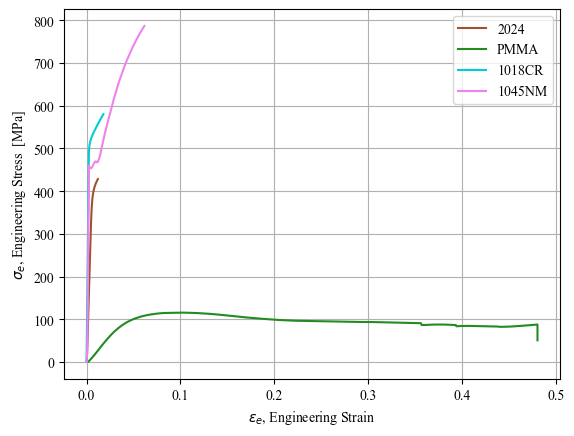

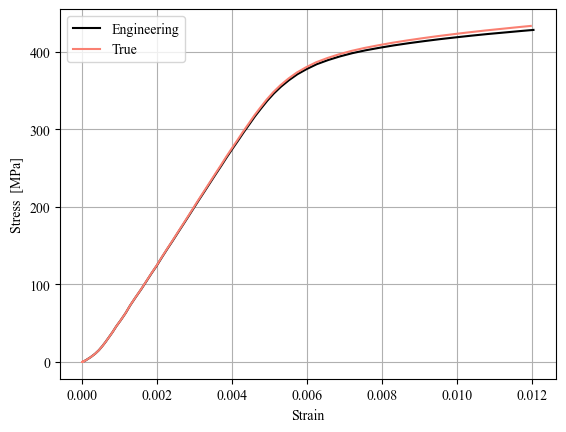

In [5]:
'''
Question 3
'''
radii = [12.80,19.16,12.80,12.72]
colors = ['sienna','forestgreen','darkturquoise','violet']
for i,k in enumerate(Dict.keys()):
    x,y = ques3(Dict[k],radii[i])
    plt.plot(x,y,colors[i],label=k)
plt.legend()
plt.grid()
plt.xlabel(r'$\epsilon_e$, Engineering Strain')
plt.ylabel(r'$\sigma_e$, Engineering Stress  [MPa]')
plt.savefig('plots/q3_all.png',dpi=600)
plt.show()

al2024 = Dict['2024']
estrain,estress = ques3(al2024,radii[0])
tstrain,tstress = np.log(1+estrain),estress*(1+estrain)
plt.plot(estrain,estress,'k',label = 'Engineering')
plt.plot(tstrain,tstress,'salmon',label = 'True')
plt.grid()
plt.xlabel(r'Strain')
plt.ylabel(r'Stress  [MPa]')
plt.legend()
plt.savefig('plots/q3_engvtru.png',dpi = 600)
plt.show()

1045NM 229898.35779411555 786.9296264580877


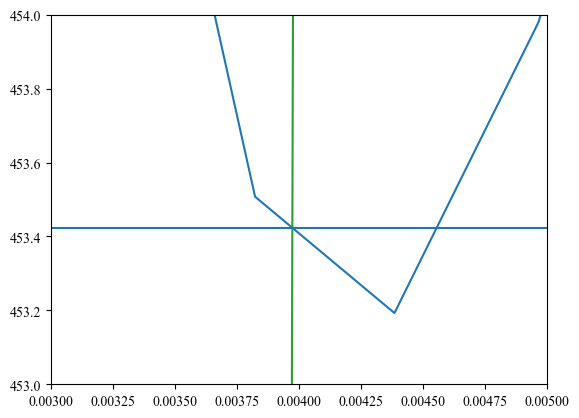

In [76]:
'''
Question 4
'''
def _plot(m,offset,ub):
    b = -m*offset
    x = np.linspace(offset,ub,1000)
    plt.plot(x,m*x+b)
radii = [12.80,19.16,12.80,12.72]
bounds = [[30,60]]
slopes = []

for i, key in enumerate(Dict.keys()):
    lb,ub = 15,50
    if i ==3:
        x,y = ques3(Dict[key],radii[i])
        _x,_y = x[lb:ub],y[lb:ub]
        plt.plot(x,y)
        plt.plot(_x,_y)
        m = linregress(_x,_y).slope
        print(key,m,max(y))
        _plot(m,.002,.01)
        plt.ylim(453,454)
        plt.xlim(0.003,.005)
        plt.axhline(453.422)
        plt.show()

In [9]:
np.array(slopes)/1000

array([225.95921967,   8.23569727, 648.39931073, 669.85758341])